# Milestone 1
Building on previous exercises, build an interactive application that asks the user a series of questions and then stores the user's answers for later analysis.

## Requirements
Your submission should include the following:
- A Chatbot that asks three users a series of at least three questions.
- Your chatbot should store the user's responses in a data structure, preferably a Pandas DataFrame, so that it can present a graphical analysis of the responses.
- Your chatbot should provide at least one visualization, such as a vertical bar chart, that provides a basic summary and analysis of the user input.

## Example Code

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Create a Basic Chatbot

In [ ]:
## Simple interactive chatbot
user = input("What is your name? ")
print("Type 'end' or 'quit' to quit.")
while True:
    msg = input("Hi how can I help you? ")
    if ("end" in msg) | ("quit" in msg):
        break
    print("you said {} words and {} letters".format(len(msg.split(" ")), len(msg)),
        end="\n")

In [2]:
power, questions, users = True, 0, 0
names, ages, heights, weights = [], [], [], [] 

while power == True:
    while users != 3:
        questions = 0

        if users == 0:
            user_number = 'first'
        elif users == 1:
            user_number = 'second'
        elif users == 2:
            user_number = 'third'

        while questions != 4:
            if questions == 0:
                user_input = str(input(f"What is your name, our {user_number} user?"))
                user_name = user_input
                names.append(user_name)
                questions += 1
            elif questions == 1:
                user_input = int(input(f"How old are you, {user_name}?"))
                ages.append(user_input)
                questions += 1
            elif questions == 2:
                user_input = float(input(f"How tall are you in centimeters, {user_name}?"))
                heights.append(user_input)
                questions += 1
            elif questions == 3:
                user_input = float(input(f"How much do you weight in kilograms, {user_name}?"))
                weights.append(user_input)
                questions += 1
                if users == 2:
                    power = False
            else:
                pass

        users += 1

What is your name, our first user? Alice
How old are you, Alice? 21
How tall are you in centimeters, Alice? 165
How much do you weight in kilograms, Alice? 78
What is your name, our second user? Bob
How old are you, Bob? 25
How tall are you in centimeters, Bob? 189
How much do you weight in kilograms, Bob? 78
What is your name, our third user? Chris
How old are you, Chris? 28
How tall are you in centimeters, Chris? 177
How much do you weight in kilograms, Chris? 79


### Initialize a DataFrame to Store User Input

In [ ]:
# Sample Code
data_store = pd.DataFrame()

In [3]:
# At this step, the dataframe is not only initilized, but have data stored
df = pd.DataFrame(data={'name': names, 'age': ages, 'height': heights, 'weight': weights})

### Run the Chatbot and Save Each User's Answers

In [ ]:
## Simple interactive chatbot
user_responses = []
escape = 'QT'
user = input("What is your name? ")
question = "Are you a stduent?"
print(f'I will ask a few questions. Press "{escape}" to quit.')

while True:
    response = input(f"{question} ")
    if escape in response:
        print('Bye!')
        break
    new_response = {'user_name': user, 'question': question, 'response': response}
    user_responses.append(new_response)

new_data = pd.DataFrame(user_responses)
data_store = pd.concat([data_store, new_data])
print("Thanks for your response. I've made a note of it.")

In [8]:
# The chatbot is already ran with the user's answers stored

### View Cumulative Data

In [ ]:
# Sample Code
data_store

In [4]:
df.to_csv('./data.csv')
df

,name,age,height,weight
0,Alice,21,165.0,78.0
1,Bob,25,189.0,78.0
2,Chris,28,177.0,79.0


### Analyze Data

In [ ]:
# Sample Code
data_store['response'].value_counts().plot(kind='barh', xlabel="Are you a stduent?")

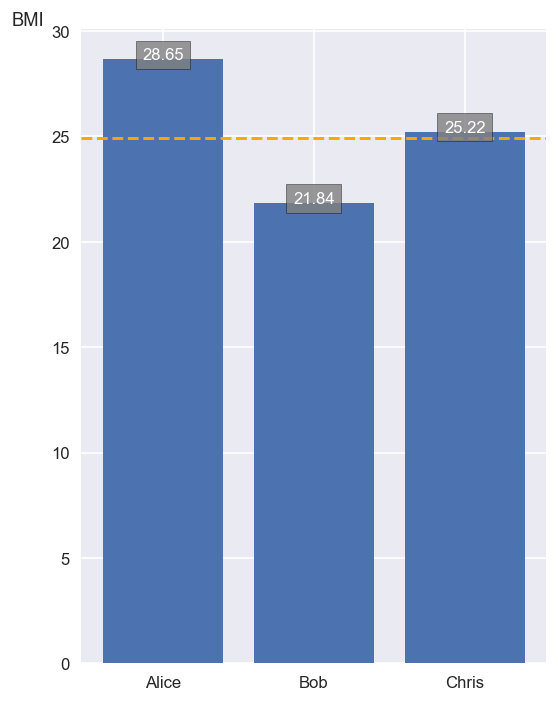

In [5]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

plt.style.use('seaborn')

bmi_values = round(df.weight / ((df.height / 100) ** 2), 2).values
name_labels = df.name.values

plt.figure(figsize=(5, 7), dpi=120)
plt.bar(x=[1, 2, 3], height=bmi_values, tick_label=name_labels)
plt.ylabel('BMI', loc='top', rotation=0)

for i in range(1, 4):
    plt.text(i, bmi_values[i-1], str(bmi_values[i-1]), ha='center', color='white', bbox=dict(facecolor='grey', alpha=.8))

plt.axhline(y=24.9, color='orange', linestyle='dashed')    
plt.show()

## Be Creative!
Don't limit yourself to a simple Q&A. Feel free to explore things like the sentiment analysis that we did in Lab 1 by determining whether a user's input is positive or negative (remember the positive and negative word lists).